<a href="https://colab.research.google.com/github/HyeJung-Hwang/Statistic_Learning_Theory/blob/main/%EC%95%94%ED%99%98%EC%9E%90_%EC%A7%84%EB%8B%A8(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io

# Training dataset 생성


In [3]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving Train_Data.txt to Train_Data.txt


Saving Test_Data.txt to Test_Data.txt


In [4]:
# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_train)

df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
print(df_test)
#replace missing value ? with 0


          ID  x1  x2  x3  x4  x5  x6  x7  x8  x9  class
0    1000025   5   1   1   1   2   1   3   1   1      2
1    1002945   5   4   4   5   7  10   3   2   1      2
2    1015425   3   1   1   1   2   2   3   1   1      2
3    1016277   6   8   8   1   3   4   3   7   1      2
4    1017023   4   1   1   3   2   1   3   1   1      2
..       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
495  1170945   3   1   1   1   1   1   2   1   1      2
496  1181567   1   1   1   1   1   1   1   1   1      2
497  1182404   4   2   1   1   2   1   1   1   1      2
498  1204558   4   1   1   1   2   1   2   1   1      2
499  1217952   4   1   1   1   2   1   2   1   1      2

[500 rows x 11 columns]
          ID  x1  x2  x3  x4  x5 x6  x7  x8  x9  class
0    1224565   6   1   1   1   2  1   3   1   1      2
1    1238186   4   1   1   1   2  1   2   1   1      2
2    1253917   4   1   1   2   2  1   2   1   1      2
3    1265899   4   1   1   1   2  1   3   1   1      2
4    1268766   1   1   1   1

## Feature Selection or Manipulation
사이킷런 feature_selection 라이브러리의
SelectFromModel 함수 이용


(1) train, test data 초기화

In [5]:
X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
# print(X['x6'][0:10])

y = df_train['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
## feature 선택
x_train = torch.Tensor(np.array([X['x1'],X['x2'], X['x3'], X['x4'], X['x5'],X['x6'], X['x7'], X['x8'], X['x9']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3] ,X['x2'],X['x3'],X['x7']
print(x_train.shape)

# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(y).unsqueeze(1) # [500] -> [500, 1]
print(y_train.shape)

torch.Size([500, 9])
torch.Size([500, 1])


(2) C=0.01, penalty=default로 feature selection

In [6]:
#필요 라이브러리 import
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [7]:
selector = SelectFromModel(estimator=LogisticRegression(C=0.01,solver='liblinear')).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
selector.get_support()

array([False,  True, False, False,  True,  True,  True, False, False])

In [9]:
feature=np.array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'])
selected_feature=[]
for i in range(9):
    if selector.get_support()[i]:
        selected_feature.append(feature[i])

In [10]:
selected_feature

['x2', 'x5', 'x6', 'x7']

# 최종적으로 결정된 feature들로 train accuracy와 test accuracy 계산
lambda를 0.01,0.1,0,01로 달리하며 L1 regularization과 L2 regularization을 각각 수행하여 test accuracy 비교


**정확한 error 값 계산 위해 추가적으로 validation accuracy도 계산

In [13]:
X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
# print(X['x6'][0:10])

y = df_train['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
## feature 선택
x_train = torch.Tensor(np.array([X['x2'],X['x5'],X['x6'],X['x7']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3] ,X['x2'],X['x3'],X['x7']
print(x_train.shape)
y_train = torch.Tensor(y).unsqueeze(1) # [500] -> [500, 1]
print(y_train.shape)

torch.Size([500, 4])
torch.Size([500, 1])


Train Data 생성

In [14]:
X = df_train[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})
# print(X['x6'][0:10])

y = df_train['class'].replace({2:0, 4:1})
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
## feature 선택
x_train = torch.Tensor(np.array([X['x2'],X['x5'],X['x6'],X['x7']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3] ,X['x2'],X['x3'],X['x7']

x_train,x_valid=x_train[0:399],x_train[399:]
print(x_train.shape)
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(y).unsqueeze(1) # [500] -> [500, 1]
y_train,y_valid=y_train[0:399],y_train[399:]
print(y_train.shape)

torch.Size([399, 4])
torch.Size([399, 1])


# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)

In [15]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

print(x_train.shape)

# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 2]
print(list(model.parameters()))


torch.Size([399, 4])
[Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347]], requires_grad=True), Parameter containing:
tensor([-0.4707], requires_grad=True)]


# function to get model parameters (w1, w2,w3,w4, b)

In [16]:
[w, b] = model.parameters() # Ws, bias
print(w) 
w1, w2,w3,w4= w.view(x_train.shape[1])

def get_params():
  return (w1.item(), w2.item(),w3.item(),w4.item(), b[0].item())

Parameter containing:
tensor([[ 0.2576, -0.2207, -0.0969,  0.2347]], requires_grad=True)


# Model Training

In [17]:

# instantitate optimizer 
criterion = nn.BCELoss()  # = nn.CrossEntropyLoss() # for LR with more than 2 classes
optimizer = torch.optim.SGD(model.parameters(), lr=0.02,momentum=0.9) #weight_decay=1e-5 -> L2 regularizer

# training the model 
epochs = 500
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  # calculate loss 
  loss = criterion(y_pred, y_train)
  
  la=0.01
  l_reg = torch.tensor(0.)
  for param in model.parameters():
      l_reg += torch.norm(param)  # for L1 regularizer : torch.norm(param, 1) 
  loss += la * l_reg


  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

epoch:  0 loss:  0.6204988956451416
epoch:  1 loss:  0.5941654443740845
epoch:  2 loss:  0.5661634206771851
epoch:  3 loss:  0.5505428314208984
epoch:  4 loss:  0.5420894026756287
epoch:  5 loss:  0.5306088328361511
epoch:  6 loss:  0.5110642313957214
epoch:  7 loss:  0.48489102721214294
epoch:  8 loss:  0.457746297121048
epoch:  9 loss:  0.43603992462158203
epoch:  10 loss:  0.42289993166923523
epoch:  11 loss:  0.4157584011554718
epoch:  12 loss:  0.40877971053123474
epoch:  13 loss:  0.3985211253166199
epoch:  14 loss:  0.3863321840763092
epoch:  15 loss:  0.37556353211402893
epoch:  16 loss:  0.368126779794693
epoch:  17 loss:  0.363742858171463
epoch:  18 loss:  0.36102426052093506
epoch:  19 loss:  0.3586127460002899
epoch:  20 loss:  0.3557252883911133
epoch:  21 loss:  0.3522156774997711
epoch:  22 loss:  0.34838563203811646
epoch:  23 loss:  0.34471115469932556
epoch:  24 loss:  0.34158873558044434
epoch:  25 loss:  0.33917176723480225
epoch:  26 loss:  0.3373357057571411
epoc

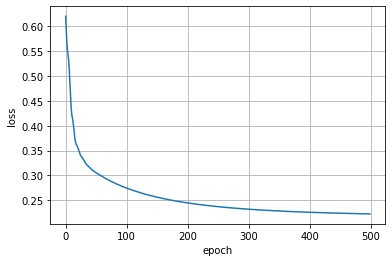

In [18]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# 최종 모델로 test accuracy 계산

In [19]:
X_test = df_test[['x1','x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].replace({'?':0})

Y_test = df_test['class'].replace({2:0, 4:1})

# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant

x_test= torch.Tensor(np.array([ X_test['x2'],X_test['x5'] ,X_test['x6'],X_test['x7']]).astype(np.uint8)).t()  # str to unit, [3, 500] ->  [500, 3] X_test['x2'],X_test['x3'], X_test['x7'],
#x_test2 = torch.Tensor(np.array([ X_test2['x2'], X_test2['x3'],X_test2['x5'],X_test1['x6'],X_test1['x7']]).astype(np.uint8)).t()
print(x_test.shape)
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(Y_test).unsqueeze(1) # [500] -> [500, 1]
print(y_test.shape)

torch.Size([199, 4])
torch.Size([199, 1])


In [20]:
#model test w/ all test datasets
no_correct = 0
for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Predcition accuracy_train= {}%".format(accuracy))

no_correct_test=0
for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct_test += 1

accuracy = no_correct_test/len(x_test)*100

print("Predcition accuracy_test= {}%".format(accuracy))

Predcition accuracy_train= 93.23308270676691%
Predcition accuracy_test= 98.99497487437185%


**validation accuracy 계산

In [21]:
no_correct = 0
for i in range(len(x_valid)):
  if model.predict(x_valid[i]) == y_valid[i]:
    no_correct += 1

accuracy = no_correct/len(x_valid)*100
print("Predcition accuracy_valid= {}%".format(accuracy))

Predcition accuracy_valid= 98.01980198019803%
